In [2]:
#서울열린데이터광장 접속
url = "https://data.seoul.go.kr/"
url

'https://data.seoul.go.kr/'

In [53]:
	
url = "http://openapi.seoul.go.kr:8088/sample/json/BukChonInOutPeopleInfo/1/5/"
url

"/".join(["a", "b", "c" ])
a = "http://openapi.seoul.go.kr:8088"
b = "55734a7962676b7334347866704867" #내 인증키
c = "xml/BukChonInOutPeopleInfo/1/5/"


In [69]:

import requests
import pprint
import json

url = 'http://openapi.seoul.go.kr:8088/55734a7962676b7334347866704867/json/BukChonInOutPeopleInfo/1/1000/'

response = requests.get(url)

contents = response.text

print(contents)
#pp = pprint.PrettyPrinter(indent=4)
#print(pp.pprint(contents))

{"BukChonInOutPeopleInfo":{"list_total_count":29346,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"DEVICEID":2.0,"DEVICENAME":"계동길 69","DESCRIPTION":"계동교회 앞","STARTTIME":"2022-11-30 21:10:41","ENDTIME":"2022-11-30 21:20:41","INCOUNT":9386.0,"OUTCOUNT":13749.0},{"DEVICEID":1.0,"DEVICENAME":"율곡로3길 50","DESCRIPTION":"덕성여고 앞","STARTTIME":"2022-11-30 21:10:41","ENDTIME":"2022-11-30 21:20:41","INCOUNT":7903.0,"OUTCOUNT":5279.0},{"DEVICEID":2.0,"DEVICENAME":"계동길 69","DESCRIPTION":"계동교회 앞","STARTTIME":"2022-11-30 21:20:41","ENDTIME":"2022-11-30 21:30:41","INCOUNT":9398.0,"OUTCOUNT":13776.0},{"DEVICEID":1.0,"DEVICENAME":"율곡로3길 50","DESCRIPTION":"덕성여고 앞","STARTTIME":"2022-11-30 21:20:41","ENDTIME":"2022-11-30 21:30:41","INCOUNT":7927.0,"OUTCOUNT":5312.0},{"DEVICEID":2.0,"DEVICENAME":"계동길 69","DESCRIPTION":"계동교회 앞","STARTTIME":"2022-11-30 21:30:41","ENDTIME":"2022-11-30 21:40:41","INCOUNT":9414.0,"OUTCOUNT":13800.0},{"DEVICEID":1.0,"DEVICENAME":"율곡로3길 50","DESCRIPTION":"덕성여고 앞","STA

In [70]:





import json

dict_data = json.loads(contents)

dict_data




{'BukChonInOutPeopleInfo': {'list_total_count': 29346,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'DEVICEID': 2.0,
    'DEVICENAME': '계동길 69',
    'DESCRIPTION': '계동교회 앞',
    'STARTTIME': '2022-11-30 21:10:41',
    'ENDTIME': '2022-11-30 21:20:41',
    'INCOUNT': 9386.0,
    'OUTCOUNT': 13749.0},
   {'DEVICEID': 1.0,
    'DEVICENAME': '율곡로3길 50',
    'DESCRIPTION': '덕성여고 앞',
    'STARTTIME': '2022-11-30 21:10:41',
    'ENDTIME': '2022-11-30 21:20:41',
    'INCOUNT': 7903.0,
    'OUTCOUNT': 5279.0},
   {'DEVICEID': 2.0,
    'DEVICENAME': '계동길 69',
    'DESCRIPTION': '계동교회 앞',
    'STARTTIME': '2022-11-30 21:20:41',
    'ENDTIME': '2022-11-30 21:30:41',
    'INCOUNT': 9398.0,
    'OUTCOUNT': 13776.0},
   {'DEVICEID': 1.0,
    'DEVICENAME': '율곡로3길 50',
    'DESCRIPTION': '덕성여고 앞',
    'STARTTIME': '2022-11-30 21:20:41',
    'ENDTIME': '2022-11-30 21:30:41',
    'INCOUNT': 7927.0,
    'OUTCOUNT': 5312.0},
   {'DEVICEID': 2.0,
    'DEVICENAME': '계동길 69',
    'DES

In [95]:
import pandas as pd

df = pd.DataFrame(dict_data['BukChonInOutPeopleInfo']['row'])
df.head()

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0


In [77]:
df.groupby('DEVICEID')[['INCOUNT', 'OUTCOUNT']].agg(['min', 'max'])
#DEVICE 2의 유동인구수가 가장 많은 것을 확인. 즉, 계동교회 앞 유동인구 수가 최대인 것을 알 수 있음.

INCOUNT          OUTCOUNT         
             min      max      min      max
DEVICEID                                   
1.0          0.0   8930.0      0.0   6837.0
2.0          0.0  21318.0      0.0  22857.0
4.0          4.0   4881.0      4.0   5623.0

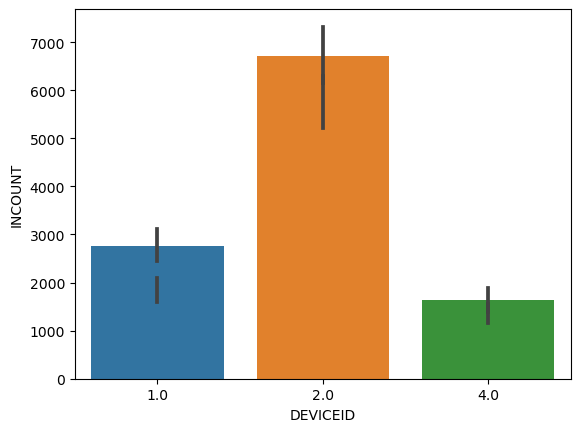

In [78]:
#DEVICE2가 INCOUNT 최대
import seaborn as sns
sns.barplot(data=df, x='DEVICEID', y='INCOUNT');

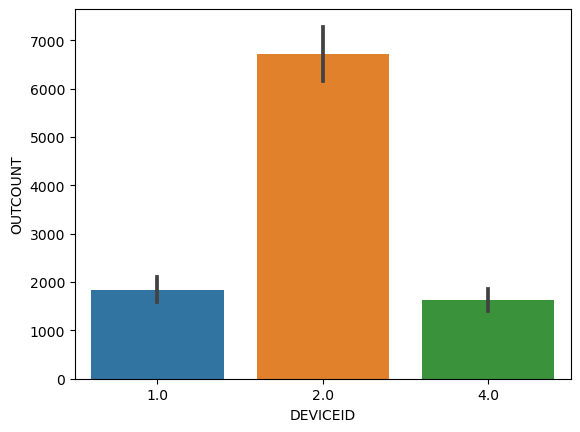

In [79]:
import seaborn as sns
sns.barplot(data=df, x='DEVICEID', y='OUTCOUNT');
#DEVICE2가 OUTCOUNT도 최대

In [117]:
df1 = df.set_index("DEVICEID")

df1 = df1.loc[[2.0],:]
df1

,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
DEVICEID,,,,,,
2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0
2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0
2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0
2.0,계동길 69,계동교회 앞,2022-11-30 23:00:41,2022-11-30 23:10:41,9625.0,14105.0
2.0,계동길 69,계동교회 앞,2022-11-30 21:40:41,2022-11-30 21:50:41,9441.0,13852.0
...,...,...,...,...,...,...
2.0,계동길 69,계동교회 앞,2022-10-28 14:40:42,2022-10-28 14:50:42,15301.0,15649.0
2.0,계동길 69,계동교회 앞,2022-10-28 14:50:42,2022-10-28 15:00:42,15551.0,15916.0
2.0,계동길 69,계동교회 앞,2022-10-28 15:00:42,2022-10-28 15:10:42,15820.0,16198.0


In [118]:

df1['STARTTIME'].astype('string')
df1['STARTTIME']=df1['STARTTIME'].str[10:]
df1

,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
DEVICEID,,,,,,
2.0,계동길 69,계동교회 앞,21:10:41,2022-11-30 21:20:41,9386.0,13749.0
2.0,계동길 69,계동교회 앞,21:20:41,2022-11-30 21:30:41,9398.0,13776.0
2.0,계동길 69,계동교회 앞,21:30:41,2022-11-30 21:40:41,9414.0,13800.0
2.0,계동길 69,계동교회 앞,23:00:41,2022-11-30 23:10:41,9625.0,14105.0
2.0,계동길 69,계동교회 앞,21:40:41,2022-11-30 21:50:41,9441.0,13852.0
...,...,...,...,...,...,...
2.0,계동길 69,계동교회 앞,14:40:42,2022-10-28 14:50:42,15301.0,15649.0
2.0,계동길 69,계동교회 앞,14:50:42,2022-10-28 15:00:42,15551.0,15916.0
2.0,계동길 69,계동교회 앞,15:00:42,2022-10-28 15:10:42,15820.0,16198.0


In [120]:
#몇 월에 유동인구 평균이 가장 높은가?
df['ENDTIME'] = pd.to_datetime(df['ENDTIME'])
df['MONTH'] = df['ENDTIME'].dt.month
df.head()

df.groupby('MONTH')['OUTCOUNT'].mean()
#11월의 유동인구 평균이 가장 크다. 결국, 11월에 가장 공격적인 마케팅 전략이 필요하다고 할 수 있다.


MONTH
1        3.000000
10    5105.711864
11    9162.588235
12    3097.090164
Name: OUTCOUNT, dtype: float64

In [1]:
echo "# Project" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/HANEOLPYTHON/Project.git
git push -u origin main

SyntaxError: invalid syntax (2334770868.py, line 1)